In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd # For data cleaning and analysis
import matplotlib.pyplot as plt # To basic plotting and visualization
import seaborn as sns # For advanced and attractive visualization

In [ ]:
#Reading the data from CSV file
df = pd.read_csv(r'D:\Nexus\data analysis\AB_NYC_2019\AB_NYC_2019.csv')
#Showing top 10 Rows from CSV file
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#showing info about CSV file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#ٍٍshowing missing data
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#deleting rows of name and host_name missed becuse its littel
df.dropna(subset=('name','host_name'),inplace=True)
#fill reviews_per_month by (0) 
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
#fill last_reviews by NAT
df['last_review'] = df['last_review'].fillna(pd.NaT)

In [7]:
#confirming that data become cleaned
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#making a group between room_type and mean of price
price_room_type = df.groupby('room_type')['price'].mean().round(1).sort_values().reset_index()
price_room_type

,room_type,price
0,Shared room,70.1
1,Private room,89.8
2,Entire home/apt,211.8


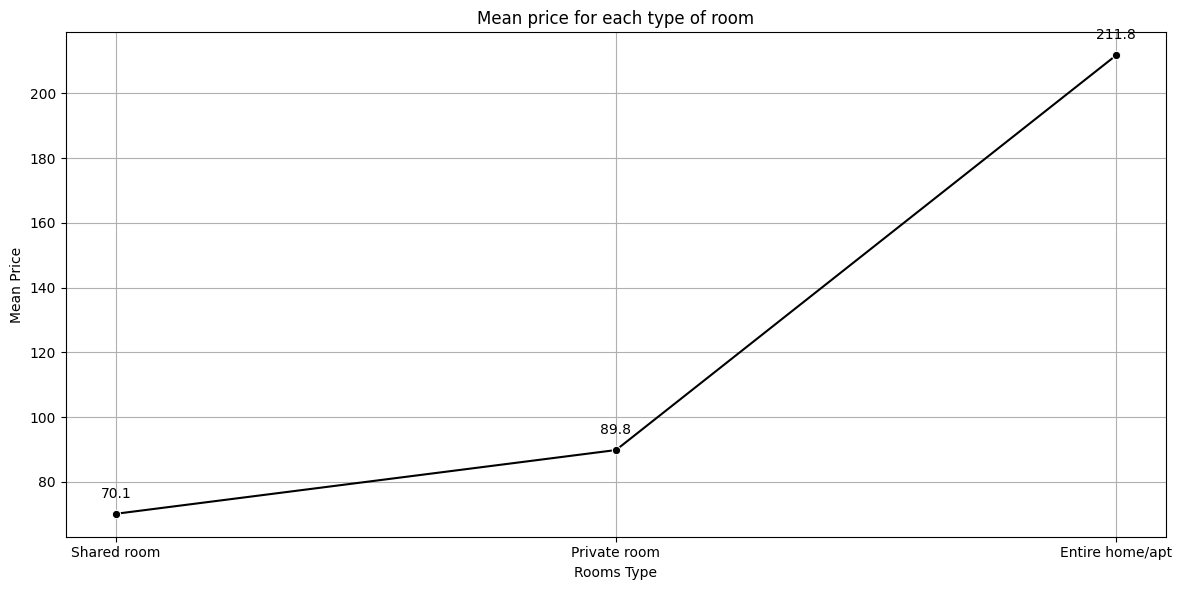

In [119]:
#showing the mean price of all rooms by type
plt.figure(figsize=(12,6))
sns.lineplot(data=price_room_type,x='room_type',y='price',color='black',marker="o")
plt.title("Mean price for each type of room")
plt.ylabel("Mean Price")
plt.xlabel('Rooms Type')
plt.grid()
plt.tight_layout()
for index,row in price_room_type.iterrows():
    plt.text(index,row['price']+5,f"{row['price']}",fontsize=10,ha='center')
plt.show()

In [10]:
#getting the mean price of neighbourhood_group by groupby
group_price = df.groupby("neighbourhood_group")['price'].mean().sort_values().reset_index()
#showing result of groupby 
group_price

,neighbourhood_group,price
0,Bronx,87.469238
1,Queens,99.536017
2,Staten Island,114.812332
3,Brooklyn,124.410523
4,Manhattan,196.897473


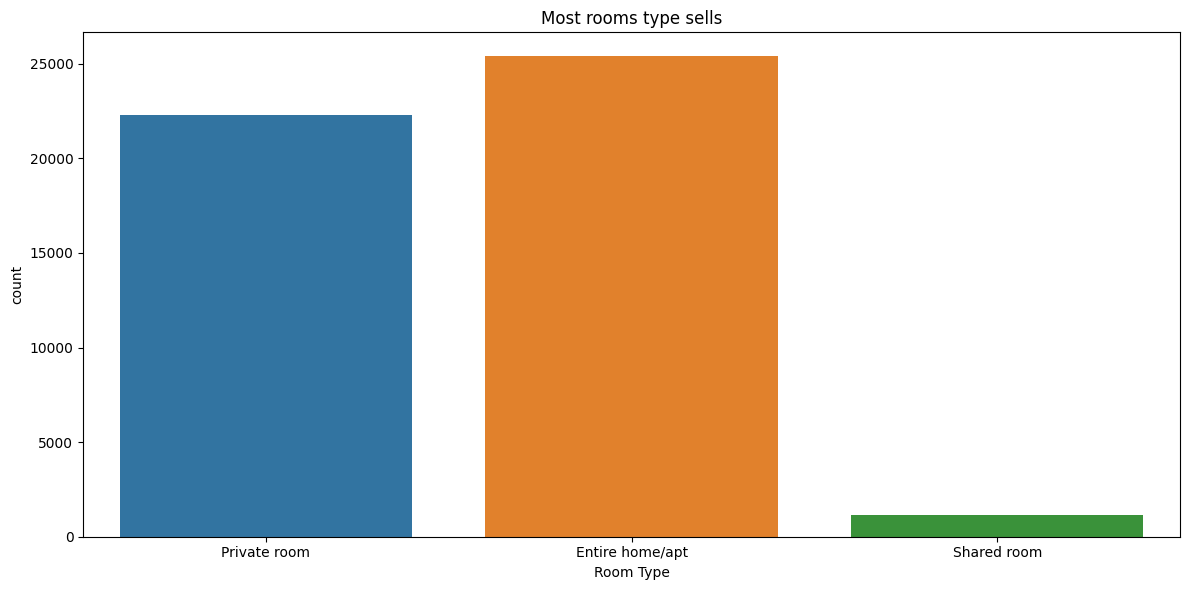

In [47]:
#Showing Most rooms type sells
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='room_type',hue='room_type')
plt.title("Most rooms type sells")
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()

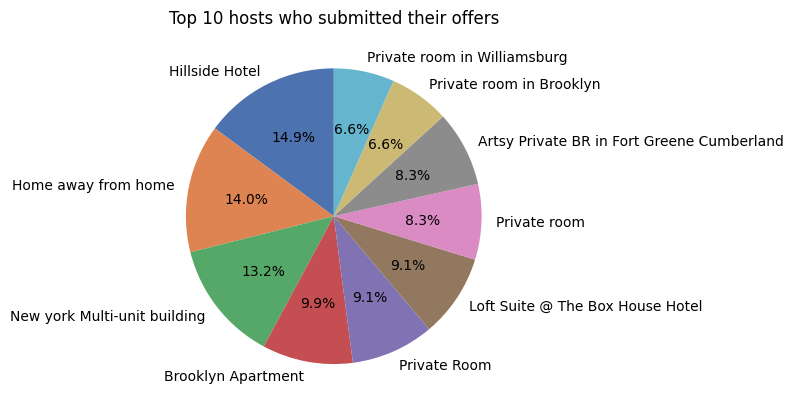

In [78]:
#showing Top 10 hosts who submitted their offers by pie plot
counts =  df['name'].value_counts().head(10)
sizes = counts.values
labels = counts.index
colors = sns.color_palette('deep')
plt.pie(sizes,labels=labels,colors=colors,startangle=90,autopct="%1.1f%%")
plt.title("Top 10 hosts who submitted their offers")
plt.show()

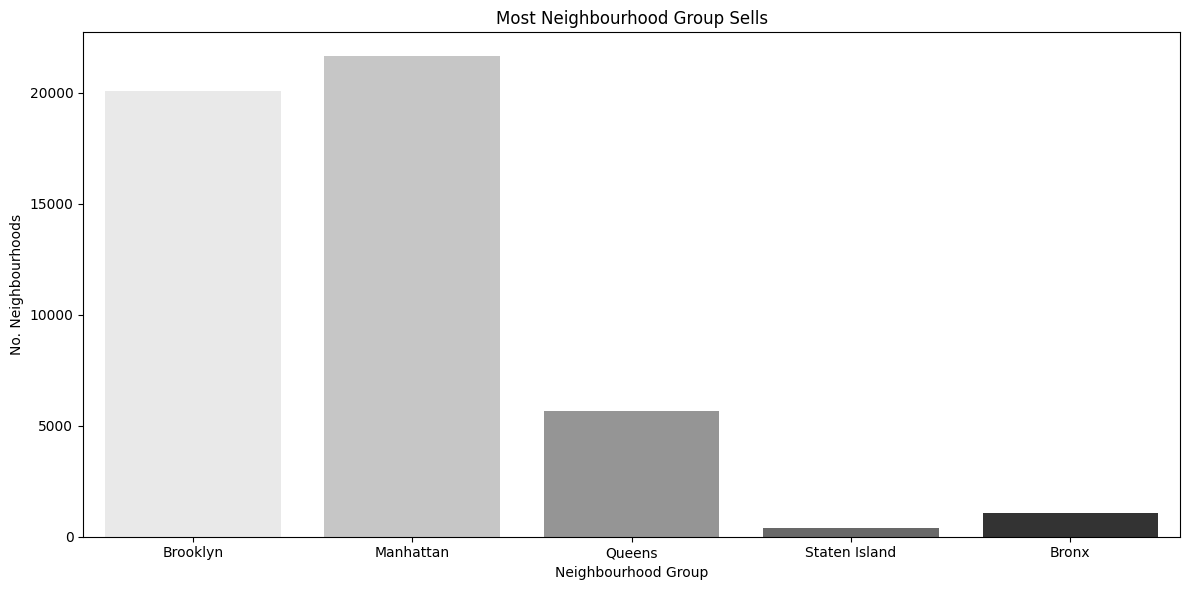

In [121]:
#showing the neighbourhood group most sells
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='neighbourhood_group',palette='Grays',hue='neighbourhood_group')
plt.title('Most Neighbourhood Group Sells')
plt.xlabel('Neighbourhood Group')
plt.ylabel('No. Neighbourhoods')
plt.tight_layout()
plt.show()

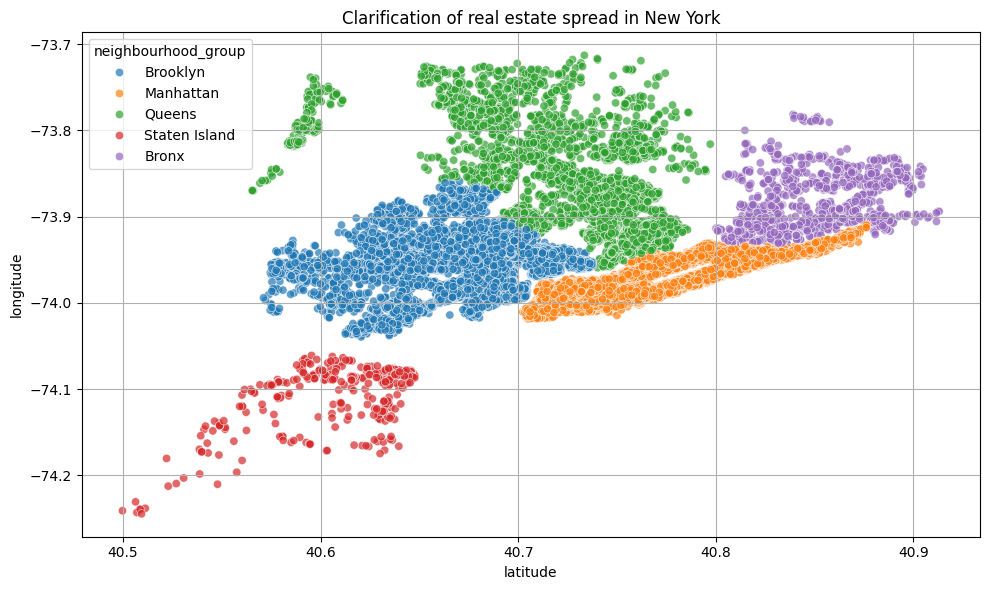

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='latitude',y='longitude',hue='neighbourhood_group',alpha=0.7)
plt.title('Clarification of real estate spread in New York')
plt.grid()
plt.tight_layout()
plt.show()

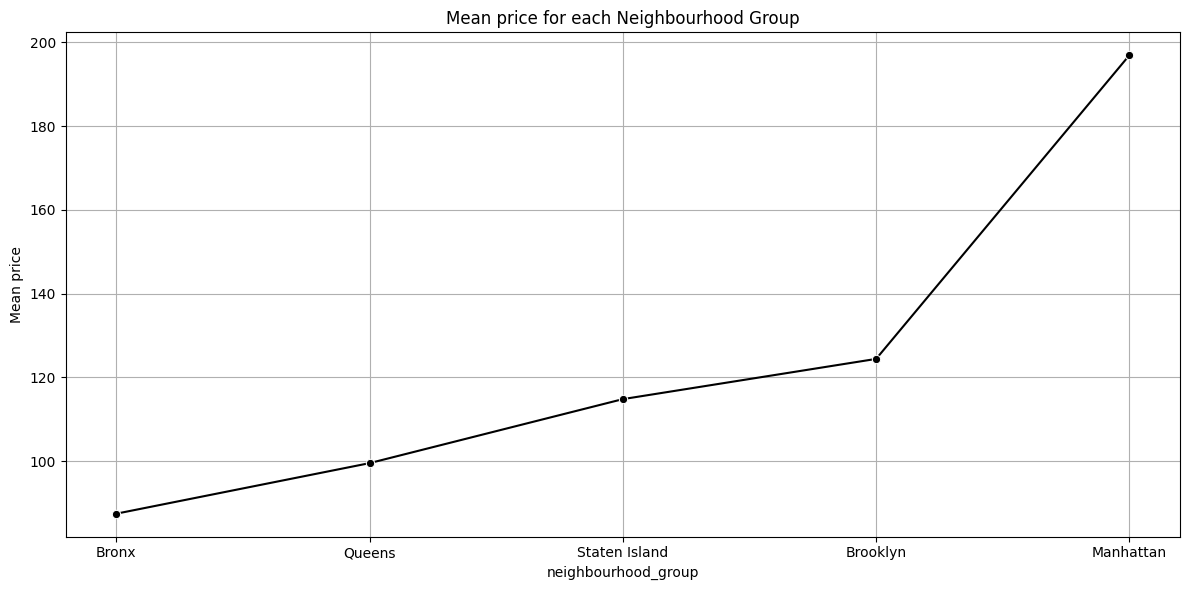

In [48]:
#showing The Mean price for each Neighbourhood Group by lineplot
plt.figure(figsize=(12,6))
sns.lineplot(data=group_price,x='neighbourhood_group',y='price',marker='o',color='black')
plt.title("Mean price for each Neighbourhood Group")
plt.ylabel('Mean price')
plt.tight_layout()
plt.grid()
plt.show()

In [72]:
#making a Groupby betweeen neighbourhood and mean price to show 10 most expensive neighbourhood
most_expensive = df.groupby(['neighbourhood','neighbourhood_group'])['price'].mean().sort_values(ascending=False).reset_index().head(10)
most_expensive

,neighbourhood,neighbourhood_group,price
0,Fort Wadsworth,Staten Island,800.000000
1,Woodrow,Staten Island,700.000000
2,Tribeca,Manhattan,490.638418
3,Sea Gate,Brooklyn,487.857143
4,Riverdale,Bronx,442.090909
5,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.086957
7,Flatiron District,Manhattan,341.925000
8,Randall Manor,Staten Island,336.000000
9,NoHo,Manhattan,295.717949


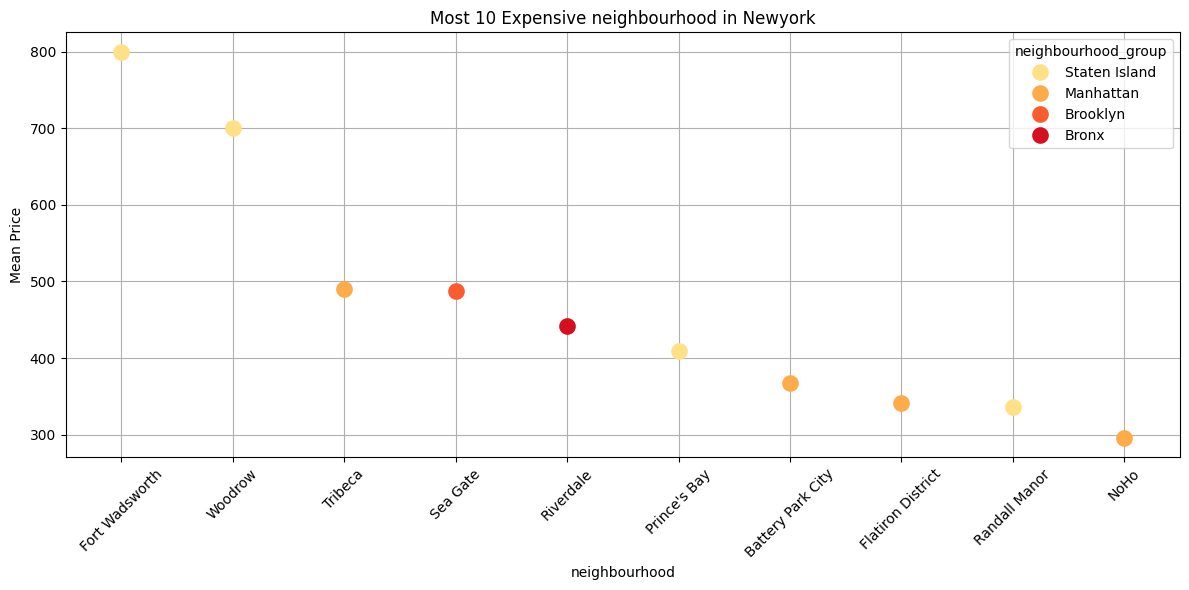

In [81]:
#showing most 10 expensive neighbourhood
plt.figure(figsize=(12,6))
sns.swarmplot(data=most_expensive,x='neighbourhood',y='price',size=12,hue='neighbourhood_group',palette='YlOrRd')
plt.xticks(rotation=45)
plt.title("Most 10 Expensive neighbourhood in Newyork")
plt.ylabel("Mean Price")
plt.tight_layout()
plt.grid()
plt.show()

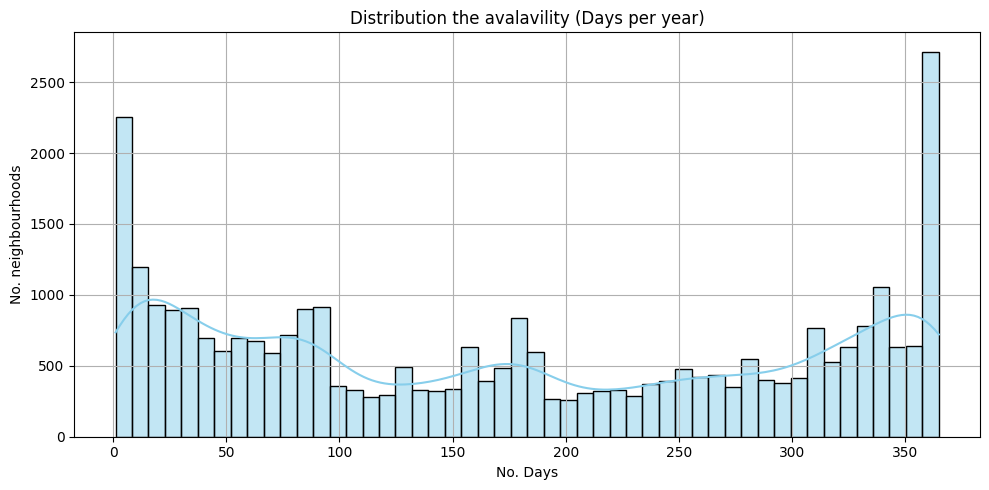

In [93]:
#Showing the available times in the neighbourhood 
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['availability_365'] > 0],x='availability_365',kde=True , bins=50 , color='skyblue')
plt.title("Distribution the avalavility (Days per year)")
plt.xlabel("No. Days")
plt.ylabel('No. neighbourhoods')
plt.tight_layout()
plt.grid()
plt.show()

In [115]:
#Conversion last_review to Data Time
df['last_review'] = pd.to_datetime(df['last_review'])
#Build a new colume Month and take months from last_review
df['month'] = df['last_review'].dt.strftime('%b')
#make a dataframe for months
months = df['month'].value_counts().reset_index()


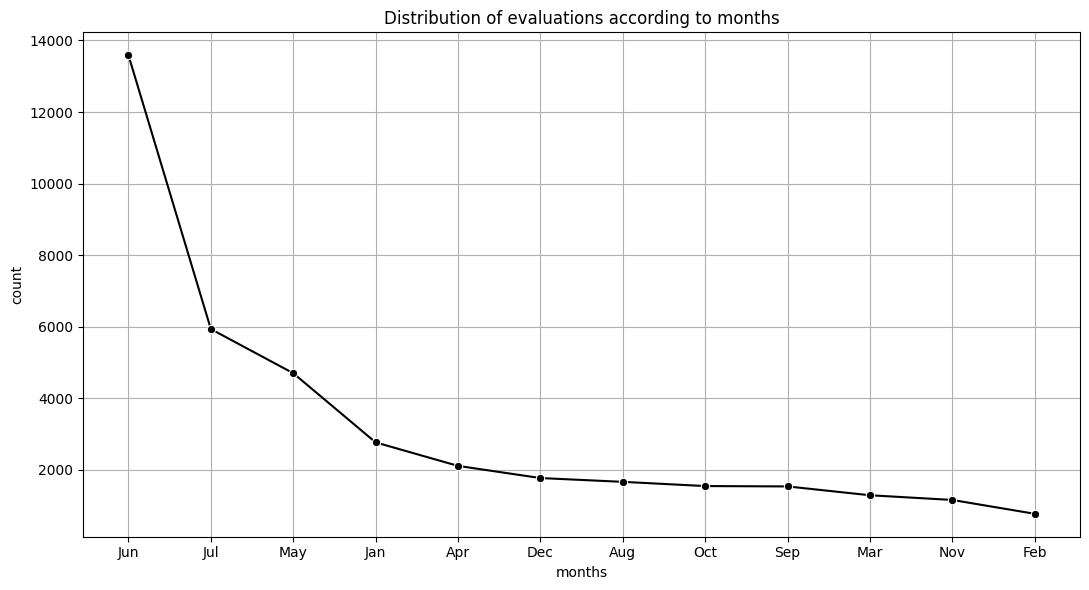

In [ ]:
#Showing the Distribution of evaluations according to months
plt.figure(figsize=(11,6))
sns.lineplot(data=months,x='month',y='count',color='black',marker='o')
plt.title('Distribution of evaluations according to months')
plt.xlabel('months')
plt.tight_layout()
plt.grid()
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

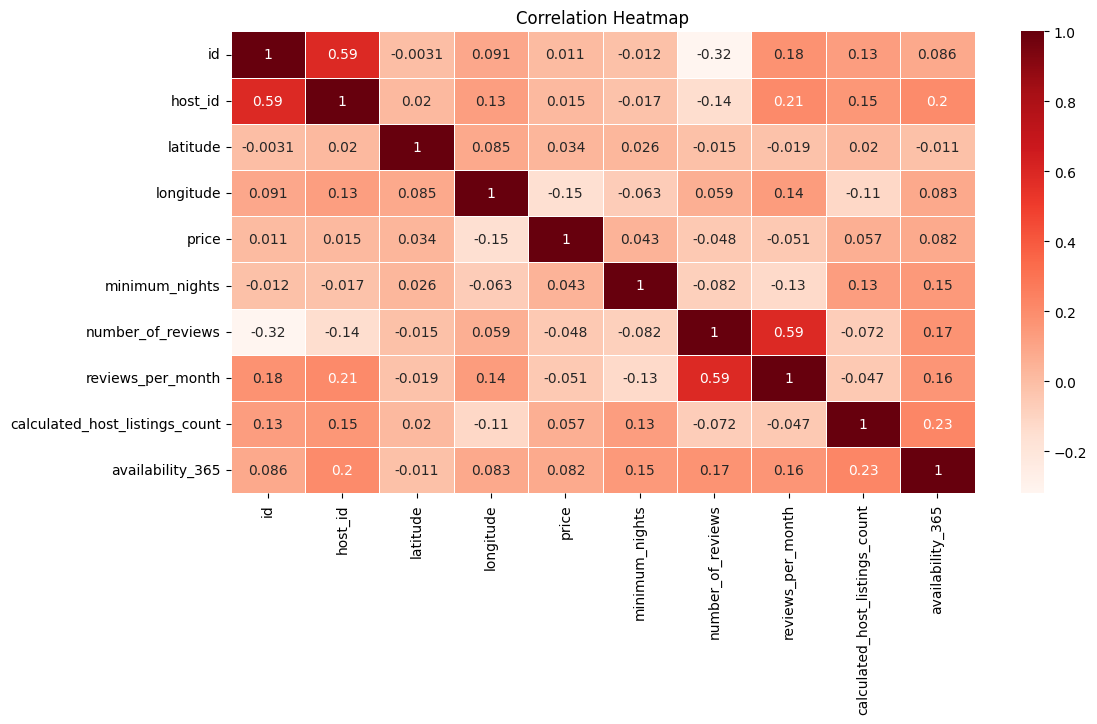

In [135]:
#Showing the Correlation betweem columes
plt.figure(figsize=(12,6))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,cmap='Reds',linewidths=0.6)
plt.title('Correlation Heatmap')
#Now we can see the relation between all numerical columes only 